In [1]:
# based on https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/in_painting_with_stable_diffusion_using_diffusers.ipynb#scrollTo=hvdHYdtTu6KA

from diffusers import StableDiffusionInpaintPipelineLegacy
from diffusers import DPMSolverMultistepScheduler
from diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint_legacy import preprocess_image
import torch
import PIL
import requests
from io import BytesIO

In [2]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionInpaintPipelineLegacy.from_pretrained(model_id, scheduler=DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler"))
pipe = pipe.to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

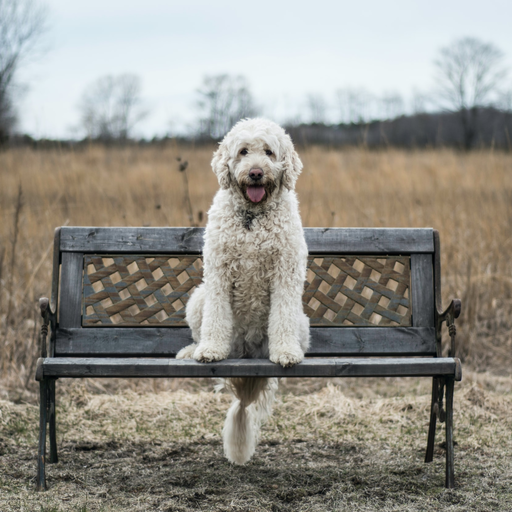

In [3]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
image = download_image(img_url).resize((512, 512))
image

In [4]:
mask_image = torch.ones(1,512,512,1) # causes shape mismatch error when running pipe inference

mask_image = torch.ones(1,4,64,64) 

In [7]:
prompt = "a mecha robot sitting on a bench"

guidance_scale=7.5
num_samples = 1
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
    num_inference_steps=5,
).images

  0%|          | 0/4 [00:00<?, ?it/s]

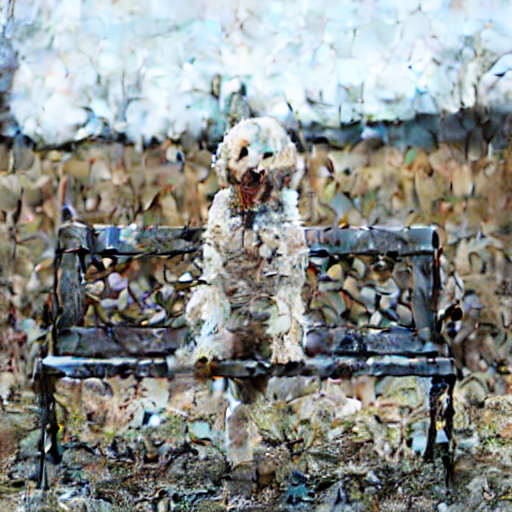

In [8]:
images[0] # expected to be original image since mask is all ones (i.e. no inpainting)